In [1]:
# Import packages to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re,os,sys
import pickle
from matplotlib import ticker, cm
#mpl.rcParams['mathtext.fontset'] = 'cm'
#import matplotlib
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# Define the path to get to library with functions libs

# Use this for Windows
#pathtolibs=os.path.dirname(os.getcwd())+'\\libs' 

# Use this for MAC
pathtolibs=os.path.dirname(os.getcwd())+'/libs' 

sys.path.insert(1, pathtolibs)

# Import previously defined functions by Rob
import tbt
#import tbtFit
import svd_clean
import tbtfunctions
import tunespace

In [3]:
# Import relevant tune scans from 02/22/2022
hscan = tunespace.scan_data('CG3_07132023_scanh.dat',normalize = 'byI(t)', filter_type = 'butter')
vscan = tunespace.scan_data('CG3_07132023_scanv.dat',normalize = 'byI(t)', filter_type = 'butter')

In [4]:
hscan.build_contour_data()
vscan.build_contour_data()
xnew = np.arange(25.31, 25.47, 3e-4)
ynew = np.arange(24.31, 24.47, 3e-4)
xnew,ynew = np.meshgrid(xnew,ynew)
fullinterp = hscan.contour_interp((xnew,ynew)) + vscan.contour_interp((xnew,ynew))
for i in range(fullinterp.shape[0]):
    fullinterp[i,fullinterp[i,:]>0]=-1e-5

/var/folders/3d/pnyvn_yx0v76lxfnqkf1vt1r0000j7/T/ipykernel_90620/4106993674.py:7: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),


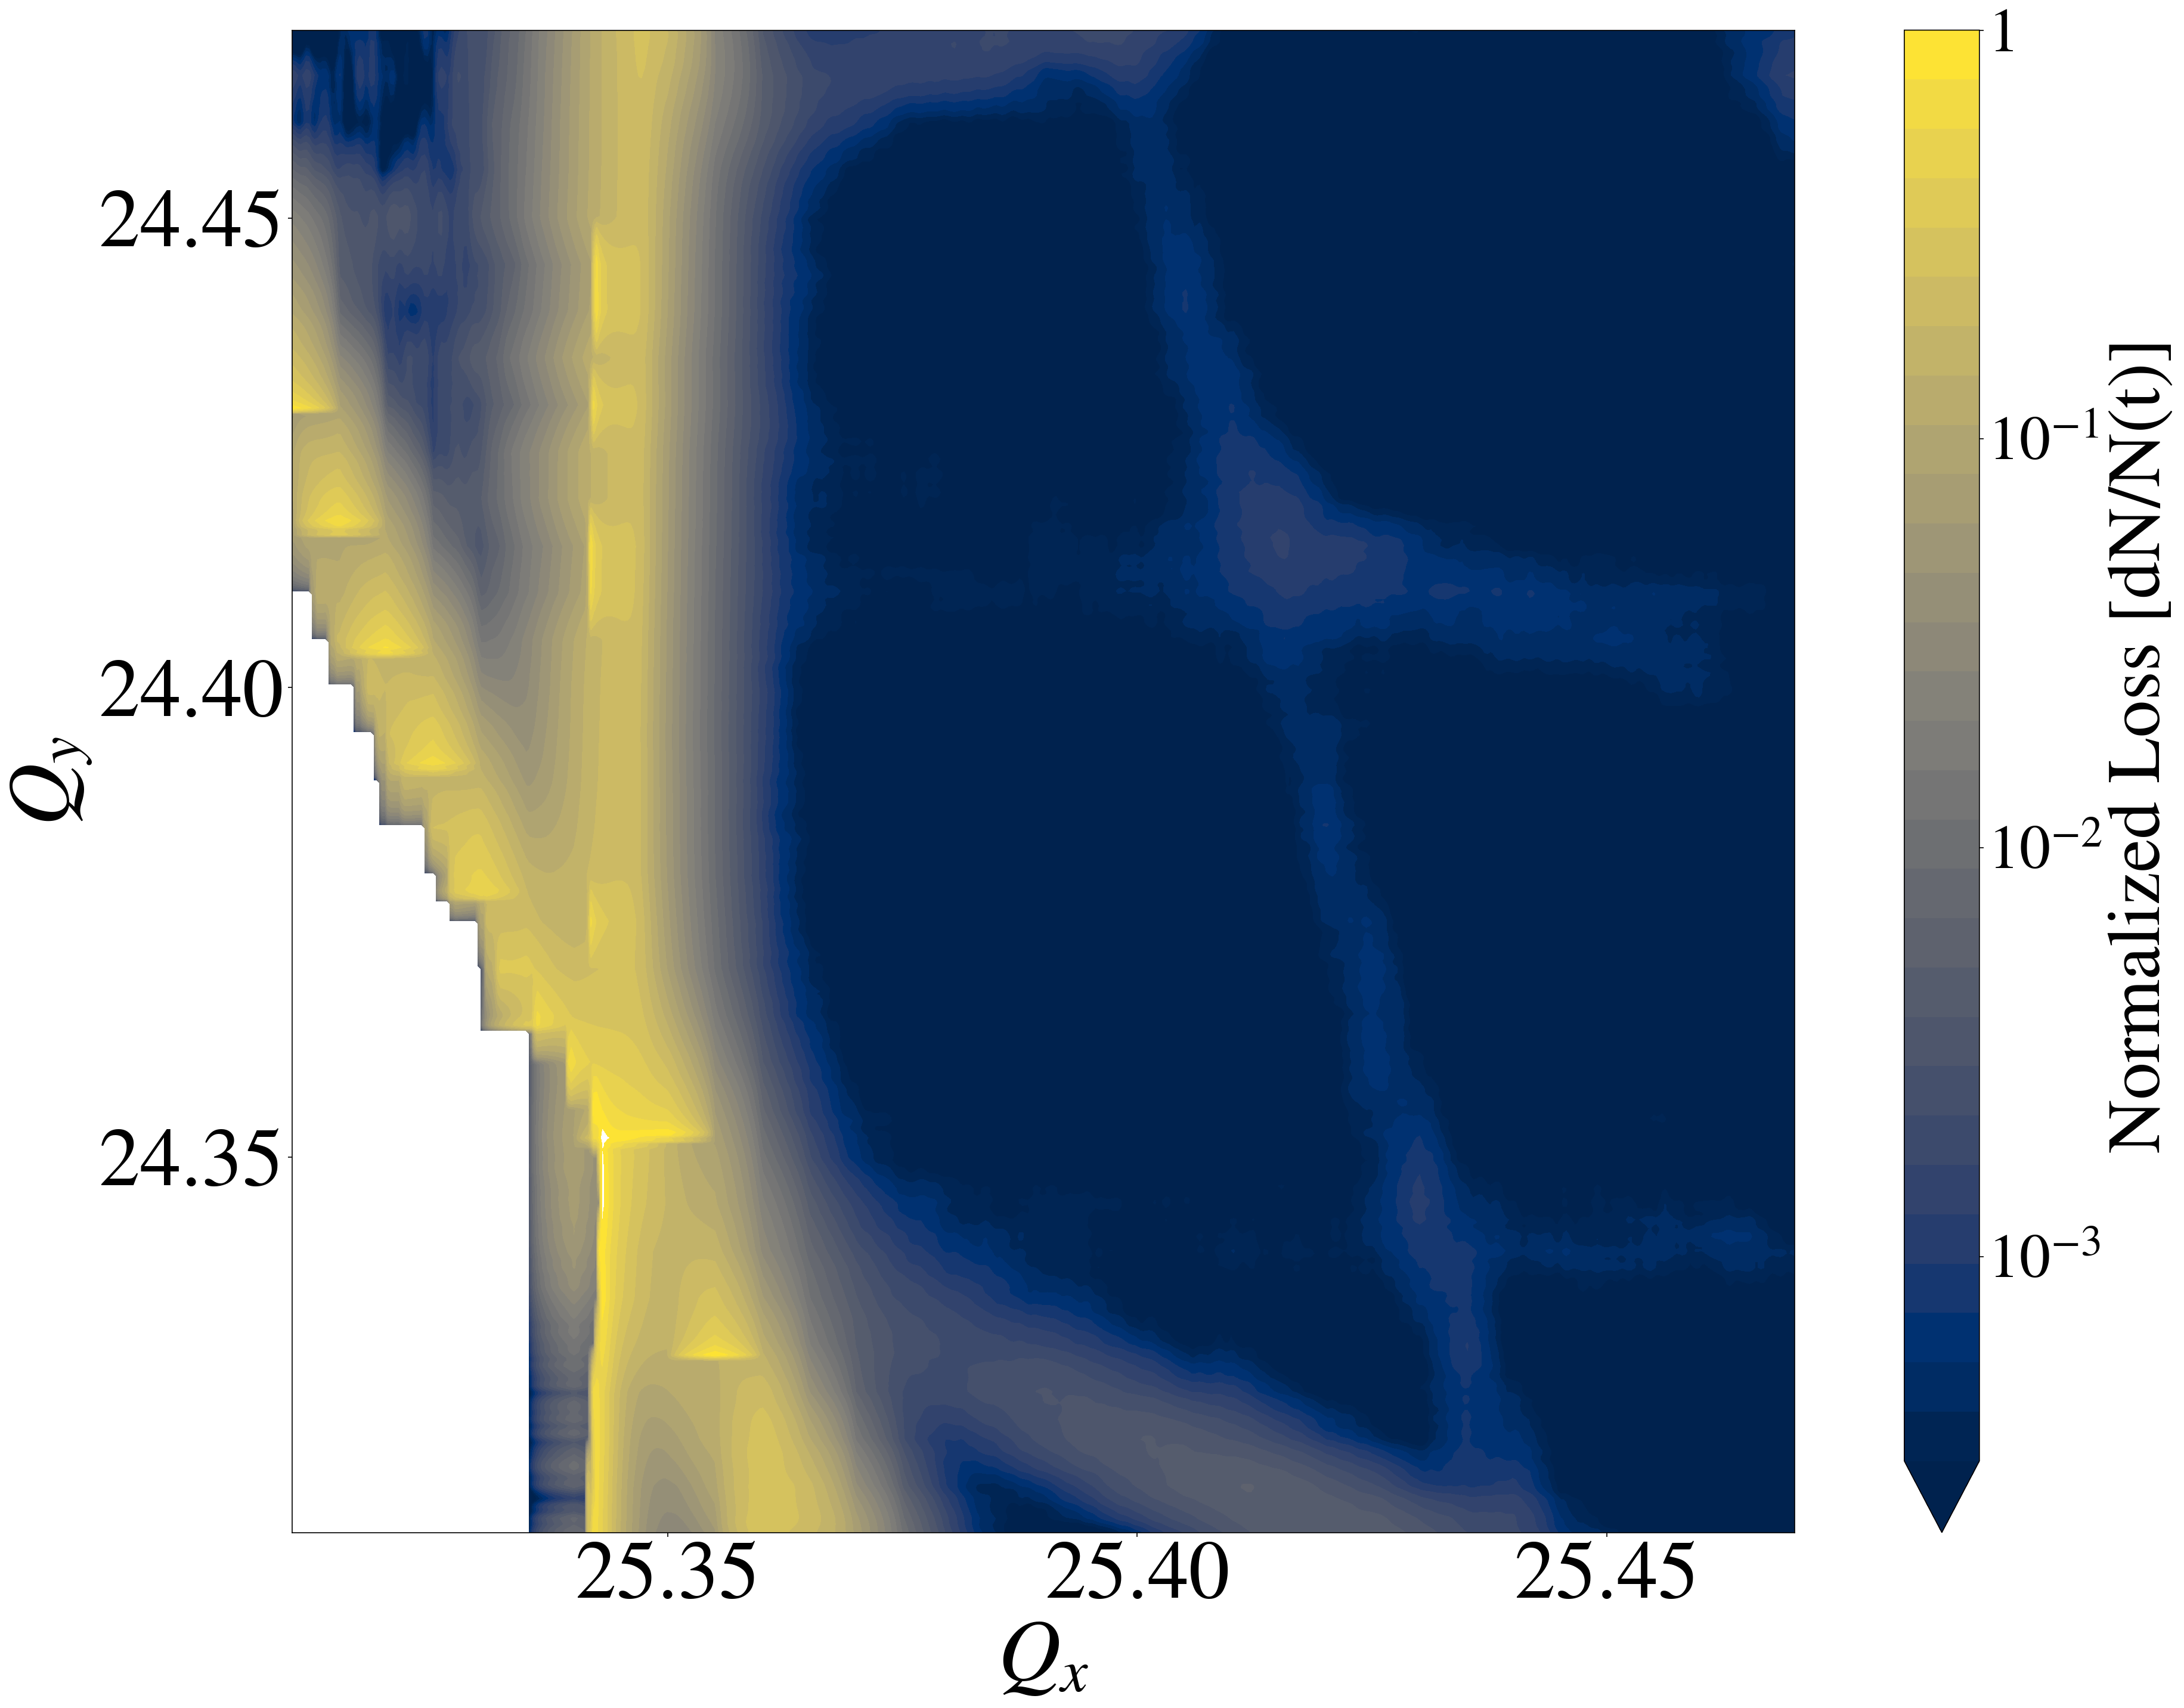

In [5]:
fig,ax = plt.subplots(1,1, figsize = (22*1.2,16*1.2))

ax.set_aspect('equal', 'box')

levs = np.logspace(-3.5,0,num = 30)
#levs = np.linspace(0,0.1,1000)
cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),
                 locator=ticker.LogLocator(numticks=10),
                 levels=levs,cmap = 'cividis',extend = 'min')

ax.set_xlabel('$Q_x$',fontsize=70)
ax.set_ylabel('$Q_y$',fontsize=70)


ax.set_xticks([25.30,25.35,25.40,25.45])
ax.set_xticklabels(['25.30','25.35','25.40','25.45'],fontsize = 66)

ax.set_yticks([24.30,24.35,24.40,24.45])
ax.set_yticklabels(['24.30','24.35','24.40','24.45'], fontsize = 66)

plt.xlim((25.31,25.47))
plt.ylim((24.31,24.47))


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(cf, ticks=np.logspace(-3,0,num = 4),)
#cbar = fig.colorbar(cf)
cbar.ax.set_yticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', '1'],fontsize = 50)
cbar.ax.set_ylabel('Normalized Loss [dN/N(t)]', fontsize = 60)

fig.set_dpi(150)
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()
plt.close()

/var/folders/3d/pnyvn_yx0v76lxfnqkf1vt1r0000j7/T/ipykernel_90620/3545455426.py:5: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),


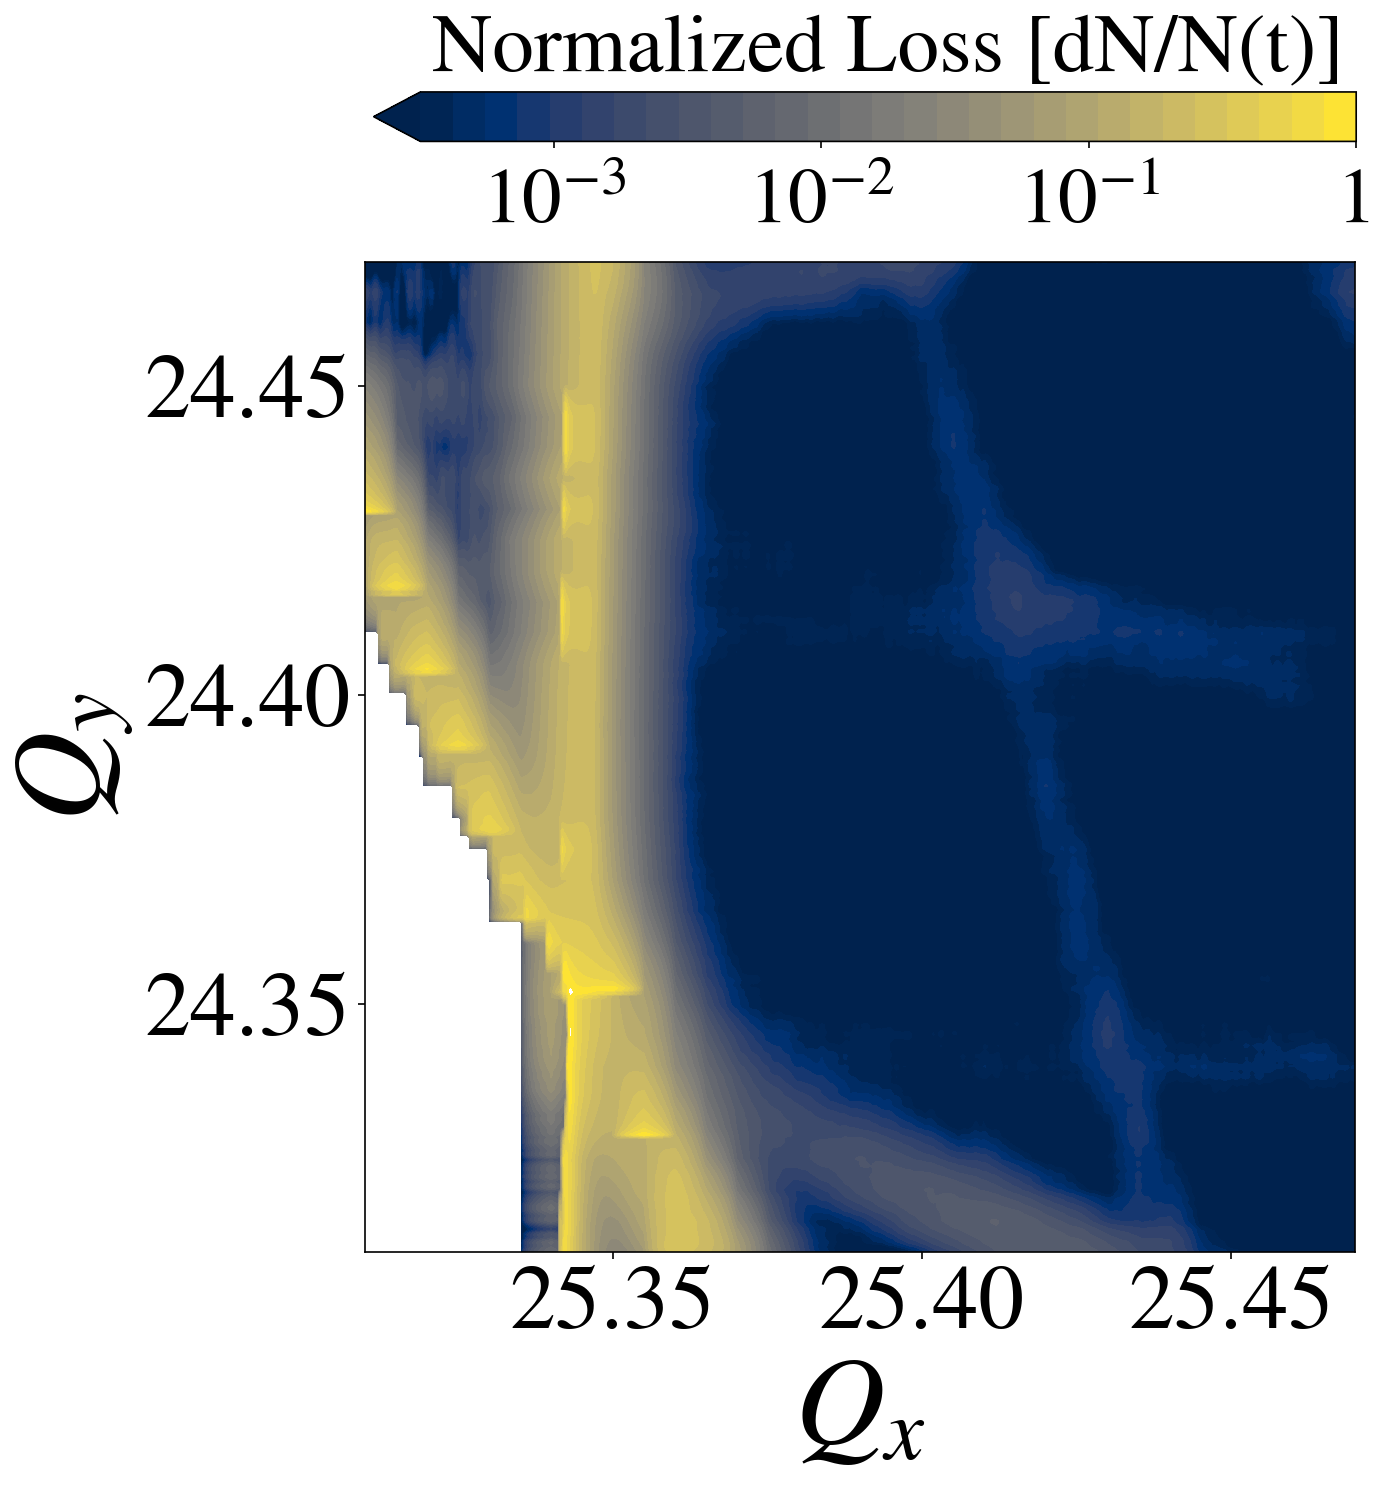

In [7]:
fig,(axb,ax) = plt.subplots(2,1, figsize = (10,10),gridspec_kw={'height_ratios': [0.25,5]})

levs = np.logspace(-3.5,0,num = 30)
#levs = np.linspace(0,0.1,1000)
cf = ax.contourf(-fullinterp,extent=(25.31,25.47,24.31,24.47),
                 locator=ticker.LogLocator(numticks=10),
                 levels=levs,cmap = 'cividis',extend = 'min')

ax.set_xlabel('$Q_x$',fontsize=60)
ax.set_ylabel('$Q_y$',fontsize=60)


ax.set_xticks([25.30,25.35,25.40,25.45])
ax.set_xticklabels(['25.30','25.35','25.40','25.45'],fontsize = 44)

ax.set_yticks([24.30,24.35,24.40,24.45])
ax.set_yticklabels(['24.30','24.35','24.40','24.45'], fontsize = 44)

ax.set_xlim((25.31,25.47))
ax.set_ylim((24.31,24.47))


# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig.colorbar(cf, cax=axb, ticks=np.logspace(-3,0,num = 4),location = 'top')
#cbar = fig.colorbar(cf)
cbar.ax.xaxis.set_ticks_position('bottom')
cbar.ax.tick_params(axis = 'x', pad = 10)
cbar.ax.set_xticklabels([r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', '1'],fontsize = 38)
cbar.ax.set_xlabel('Normalized Loss [dN/N(t)]', fontsize = 40,labelpad = 10)

plt.subplots_adjust(hspace = .2)
ax.set_aspect('equal','box')
axb.set_aspect(0.185)


fig.set_dpi(150)
fig.patch.set_facecolor('white')
plt.tight_layout()

plt.savefig('3qy_qx2qy.pdf')

plt.show()
plt.close()

In [118]:
ax.set_aspect?

Signature: ax.set_aspect(aspect, adjustable=None, anchor=None, share=False)
Docstring:
Set the aspect ratio of the Axes scaling, i.e. y/x-scale.

Parameters
----------
aspect : {'auto', 'equal'} or float
    Possible values:

    - 'auto': fill the position rectangle with data.
    - 'equal': same as ``aspect=1``, i.e. same scaling for x and y.
    - *float*: The displayed size of 1 unit in y-data coordinates will
      be *aspect* times the displayed size of 1 unit in x-data
      coordinates; e.g. for ``aspect=2`` a square in data coordinates
      will be rendered with a height of twice its width.

adjustable : None or {'box', 'datalim'}, optional
    If not ``None``, this defines which parameter will be adjusted to
    meet the required aspect. See `.set_adjustable` for further
    details.

anchor : None or str or (float, float), optional
    If not ``None``, this defines where the Axes will be drawn if there
    is extra space due to aspect constraints. The most common way
    to